# Importing Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords, cmudict
from nltk.tokenize import sent_tokenize, word_tokenize
import multiprocessing

# Describing Data

In [19]:
df_train = pd.read_csv('Dataset/train.csv')

In [20]:
df_train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [21]:
df_test = pd.read_csv('Dataset/test.csv')

In [22]:
df_test.head()

,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [23]:
df_train.shape

(17307, 3)

In [24]:
df_test.shape

(3, 2)

<AxesSubplot:>

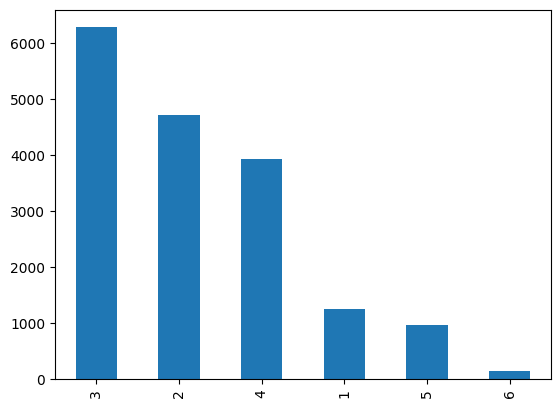

In [25]:
# make a histogram of class distrubutions of train df

df_train['score'].value_counts().plot(kind='bar')

# Data Insights and Visualisation

In [26]:
def count_unique_words(df):
    """
    Counts the number of unique words on the essays in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing the essays.

    Returns:
    num_unique_words (int): Number of unique words in the DataFrame.
    """

    all_essays = ' '.join(df['full_text'].tolist())
    words = all_essays.split()
    unique_words = set(words)
    num_unique_words = len(unique_words)
    
    return num_unique_words

In [27]:
def get_average_essay_length(df):
    """
    Calculates the average length of essays in terms of word count.

    Parameters:
    df (DataFrame): DataFrame containing the essays.

    Returns:
    average_length (float): Average length of essays in terms of word count.
    """
    
    all_essays = ' '.join(df['full_text'].tolist())
    words = all_essays.split()
    total_words = len(words)
    num_essays = len(df)
    average_length = total_words / num_essays
    
    return average_length

In [28]:
def calculate_average_word_length(df):
    """
    Calculates the average length of words used in the essays.

    Parameters:
    df (DataFrame): DataFrame containing the essays.

    Returns:
    average_word_length (float): Average length of words in the essays.
    """
    
    all_essays = ' '.join(df['full_text'].tolist())
    words = all_essays.split()
    total_characters = sum(len(word) for word in words)
    total_words = len(words)
    average_word_length = total_characters / total_words
    
    return average_word_length

In [29]:
def get_most_common_words(df, stopwords_not_included=True, num_words=10):
    """
    Identifies the most common words used in the essays along with their counts.

    Parameters:
    df (DataFrame): DataFrame containing the essays.
    stopwords (bool): Whether to include stopwords or not. If true, stopwords will be removed.
    num_words (int): Number of most common words to return.

    Returns:
    common_words (list of tuples): List of tuples containing the most common words and their counts.
    """
    all_essays = ' '.join(df['full_text'].tolist())
    words = all_essays.split()

    if (stopwords_not_included == True):
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word.lower() not in stop_words]
    
    word_counts = Counter(words)
    common_words = word_counts.most_common(num_words)

    df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
    print(df_common_words)
    
    return common_words

In [30]:
def syllable_count_word(word):
    """
    Counts the number of syllables in a word using the CMU Pronouncing Dictionary.

    Parameters:
    word (str): The word for which syllable count needs to be calculated.

    Returns:
    syllable_count (int): The number of syllables in the word.
    """

    d = cmudict.dict()
    
    if word in d:
        syllable_count = max([len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]])
    else:
        syllable_count = 1
    
    return syllable_count

def calculate_fkgl(text):
    """
    Calculates the Flesch-Kincaid Grade Level (FKGL) score for a given text.

    Parameters:
    text (str): The text for which FKGL score needs to be calculated.

    Returns:
    fkgl_score (float): The FKGL score of the text.
    """

    sentences = sent_tokenize(text)
    words = [word.lower() for sentence in sentences for word in word_tokenize(sentence)]
    
    syllable_count = 0
    for word in words:
        syllable_count += syllable_count_word(word)

    average_sentence_length = len(words) / len(sentences)
    average_syllables_per_word = syllable_count / len(words)

    fkgl_score = 0.39 * average_sentence_length + 11.8 * average_syllables_per_word - 15.59
    
    return fkgl_score

In [31]:
def plot_essay_length_distribution(df):
    """
    Plots a histogram showing the distribution of essay lengths in terms of word count.

    Parameters:
    df (DataFrame): DataFrame containing the essays.
    """
    
    all_essays = ' '.join(df['full_text'].tolist())
    words = all_essays.split()
    essay_lengths = [len(words) for words in df['full_text'].str.split()]
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(essay_lengths, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Essay Lengths')
    plt.xlabel('Length of Essay (Word Count)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Number of unique words in the dataset: 129566
Average essay length in the dataset: 368.3482405962905
Average word length in the dataset: 4.557174326035612
FKGL Score of The Australian platypus is seemingly a hybrid of a mammal and reptilian creature is 11.264615384615386

Most common words in the dataset:
     Word  Count
0   would  43621
1  people  32374
2    cars  32012
3     car  30530
4   could  29338
5    like  22464
6   Venus  21637
7     get  17290
8    also  16948
9   think  15582


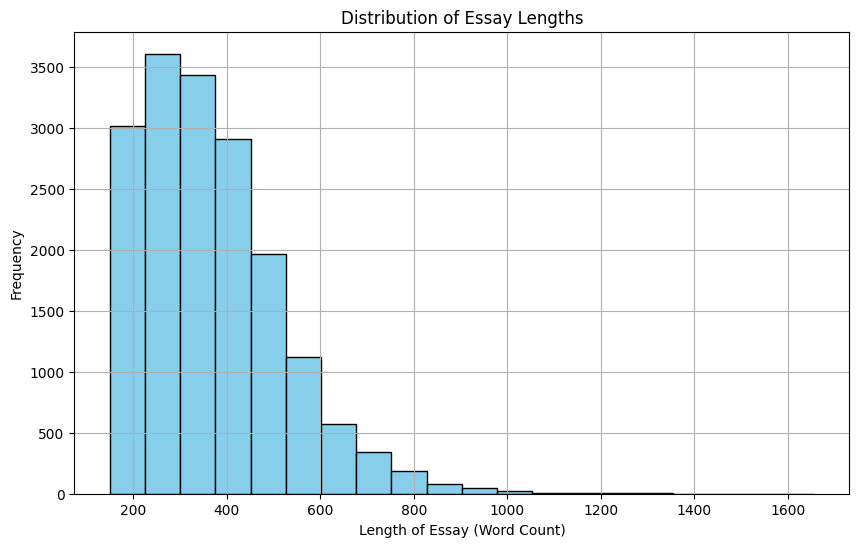

In [32]:
num_unique_words = count_unique_words(df_train)
average_essay_length = get_average_essay_length(df_train)
average_word_length = calculate_average_word_length(df_train)
print("Number of unique words in the dataset:", num_unique_words)
print("Average essay length in the dataset:", average_essay_length)
print("Average word length in the dataset:", average_word_length)
print("FKGL Score of The Australian platypus is seemingly a hybrid of a mammal and reptilian creature is" , calculate_fkgl("The Australian platypus is seemingly a hybrid of a mammal and reptilian creature"))
print("\nMost common words in the dataset:")
most_common_words = get_most_common_words(df_train)
plot_essay_length_distribution(df_train)


# Decision Trees

## TF-IDF Vectoriser

In [33]:
def perform_tfidf(df, max_features=1000, min_df=0, max_df=1.0, ngram_range=(1, 1), 
                  stop_words=None, tokenizer=None, use_idf=True, smooth_idf=True,
                  sublinear_tf=False, binary=False, norm='l2'):
    """
    Performs TF-IDF vectorization on the essays in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing the essays.
    max_features (int or None): Maximum number of features (unique words) to consider.
    min_df (float or int): Minimum document frequency for words to be included.
    max_df (float or int): Maximum document frequency for words to be included.
    ngram_range (tuple): Range of n-grams to consider.
    stop_words (str, list, or None): Stop words to be ignored during tokenization.
    tokenizer (callable or None): Custom tokenizer function.
    use_idf (bool): Whether to use inverse document frequency (IDF) in TF-IDF calculation.
    smooth_idf (bool): Whether to add a constant term to the IDF calculation.
    sublinear_tf (bool): Whether to apply logarithmic scaling to term frequency (TF) values.
    binary (bool): Whether to use binary frequency counts instead of raw term frequencies.
    norm (str or None): Normalization method for the TF-IDF matrix.

    Returns:
    tfidf_matrix (array): TF-IDF matrix representing the essays.
    feature_names (list): List of feature names (words) corresponding to the columns of the TF-IDF matrix.
    """
    # Extract essays from the DataFrame
    essays = df['full_text'].tolist()

    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df, max_df=max_df,
                                       ngram_range=ngram_range, stop_words=stop_words,
                                       tokenizer=tokenizer, use_idf=use_idf,
                                       smooth_idf=smooth_idf, sublinear_tf=sublinear_tf,
                                       binary=binary, norm=norm)
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(essays)

    feature_names = tfidf_vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names